# Homework 2

This homework should be submitted <b>by LT</b>.   

LT Number:

Names:

Do <b><u>NOT</u></b> import any other libraries aside from those below.

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

Loading the 8 functions:

In [ ]:
import inspect
import itertools
import re

In [393]:
def linear(x, m1, b1):
    return m1*x + b1

def quadratic(x, a2, b2, c2):
    return (a2 * x * x) + (b2 * x) + c2

def quadraticn(x, a2n, b2n, c2n):
    return (-a2n * x * x) + (b2n * x) + c2n

def cubic(x, a3, b3, c3, d3):
    return (a3 * x * x * x) + (b3 * x * x) + (c3 * x) + d3

def sine(x, A4, f4, C4):
    return A4 * np.sin((2 * np.pi * f4 * x) + C4)

def sinec(x, A4c, f4c, C4c, D4c):
    return A4c * np.sin((2 * np.pi * f4c * x) + C4c) + D4c

def exponential(x, A5, b5):
    return A5 * np.exp(-b5 * x)

def powerlaw(x, A6, alpha6):
    return A6 * (np.power(x, alpha6))

def powerlawn(x, A6m, alpha6n):
    return A6m * (np.power(x, -alpha6n))

def logistic(x, A7, k7, x07):
    return A7/(1 + np.exp(-k7 * (x - x07)))

def gaussian(x, mean, stdev):
    return (1/np.sqrt(2 * np.pi * stdev**2)) * np.exp(-(x - mean)**2 / (2*stdev**2))

In [884]:
def sinep(x, A4, f4, C4):
    return abs(A4 * np.sin((2 * np.pi * f4 * x) + C4))

def cosinep(x, A4, f4, C4):
    return abs(A4 * np.cos((2 * np.pi * f4 * x) + C4))

In [885]:
def rsine(x, A4, f4, C4):
    ind = np.array([0 if x_val < 0 else 1 for x_val in x])
    return ind * A4 * np.sin((2 * np.pi * f4 * x) + C4)

def rcosine(x, A4, f4, C4):
    ind = np.array([0 if x_val < 0 else 1 for x_val in x])
    return ind * A4 * np.cos((2 * np.pi * f4 * x) + C4)

Loading helper functions:

In [407]:
def calc_ssr(y, yhat):
    return sum((y - yhat)**2)

names = ['linear', 'quadratic', 'quadraticn', 'cubic', 'sine', 'sinec', 'exponential', 'logistic']
fns = [linear, quadratic, quadraticn, cubic,  sine, sinec, exponential, logistic]
fns_dict = dict(zip(names, fns))

names_comb = []
for L in range(0, len(names)+1):
    for subset in itertools.combinations(names, L):    
        names_comb.append(' + '.join(subset))
names_comb = names_comb[1:]
names_comb = [fn for fn in names_comb if len(re.findall('quadratic', fn)) <= 1]
names_comb = [fn for fn in names_comb if len(re.findall('sine', fn)) <= 1]

for i in range(len(names_comb)):
    text2 = []
    all_args = []
    for fn in names_comb[i].split(' + '):
        args = inspect.getfullargspec(fns_dict[fn]).args[1:]
        all_args.append(args)
        text2.append(f"{fn}(x, {', '.join(args)})")
    text2 = ' + '.join(text2)
    text1 = f"def my_{names_comb[i].replace(' + ', '_')}(x, {', '.join(list(itertools.chain(*all_args)))}):"
    exec(f"{text1}\n\treturn {text2}")
    print(f"Successfully created fn: {text1}\n\treturn {text2}")

fns_comb = []
for L in range(0, len(names)+1):
    for subset in itertools.combinations(names, L):    
        fns_comb.append('_'.join(subset))
fns_comb = fns_comb[1:]
fns_comb = ['my_' + fn for fn in fns_comb]
fns_comb = [fn for fn in fns_comb if len(re.findall('quadratic', fn)) <= 1]
fns_comb = [fn for fn in fns_comb if len(re.findall('sine', fn)) <= 1]
fns_comb = [eval(fn) for fn in fns_comb]

def find_fn(x, y, ind, fit_gaussian = True, starting_param = 1):
    name_list = []
    popt_list = []
    ssr_list = []

    fns_comb_dict = dict(zip([names_comb[i] for i in ind], 
                             [fns_comb[i] for i in ind]))
    for name, fn in fns_comb_dict.items():
        n_args = len(inspect.getfullargspec(fn).args) - 1
        p0 = [starting_param]*n_args
        popt, pcov = curve_fit(fn, x, y, p0 = p0)
        yhat = fn(x, *popt) ## calculate yhat

        # Saving output
        name_list.append(name)
        popt_list.append(popt)
        ssr_list.append(calc_ssr(y, yhat))

    params_df = pd.DataFrame({'name': name_list,
                              'parameters': popt_list,
                              'ssr': ssr_list})
    
    if fit_gaussian == True:
        y = np.histogram(x, bins = len(x), density = True)[0]
        yhat = gaussian(x, np.mean(x), np.std(x))
        params_df = params_df.append({'name': 'my_gaussian',
                                      'parameters': [np.mean(x), np.std(x)],
                                      'ssr': calc_ssr(y, yhat)}, ignore_index = True)
    
    params_df = params_df.sort_values('ssr')
    return params_df

Successfully created fn: def my_linear(x, m1, b1):
	return linear(x, m1, b1)
Successfully created fn: def my_quadratic(x, a2, b2, c2):
	return quadratic(x, a2, b2, c2)
Successfully created fn: def my_quadraticn(x, a2n, b2n, c2n):
	return quadraticn(x, a2n, b2n, c2n)
Successfully created fn: def my_cubic(x, a3, b3, c3, d3):
	return cubic(x, a3, b3, c3, d3)
Successfully created fn: def my_sine(x, A4, f4, C4):
	return sine(x, A4, f4, C4)
Successfully created fn: def my_sinec(x, A4c, f4c, C4c, D4c):
	return sinec(x, A4c, f4c, C4c, D4c)
Successfully created fn: def my_exponential(x, A5, b5):
	return exponential(x, A5, b5)
Successfully created fn: def my_logistic(x, A7, k7, x07):
	return logistic(x, A7, k7, x07)
Successfully created fn: def my_linear_quadratic(x, m1, b1, a2, b2, c2):
	return linear(x, m1, b1) + quadratic(x, a2, b2, c2)
Successfully created fn: def my_linear_quadraticn(x, m1, b1, a2n, b2n, c2n):
	return linear(x, m1, b1) + quadraticn(x, a2n, b2n, c2n)
Successfully created fn:

# SCRATCH

In [358]:
x = x1
y = y1

names = ['linear', 'quadratic', 'cubic', 'sine', 'exponential', 'logistic']
fns = [linear, quadratic, cubic,  sine, exponential, logistic]
fns_dict = dict(zip(names, fns))

name_list = []
popt_list = []
ssr_list = []
for name, fn in fns_dict.items():
    n_args = len(inspect.getfullargspec(fn).args) - 1
    p0 = [1]*n_args
    popt, pcov = curve_fit(fn, x, y, p0 = p0)
    yhat = fn(x, *popt) ## calculate yhat
    
    # Saving output
    name_list.append(name)
    popt_list.append(popt)
    ssr_list.append(calc_ssr(y, yhat))
    
params_df = pd.DataFrame({'name': name_list,
                          'parameters': popt_list,
                          'ssr': ssr_list})
params_df = params_df.sort_values('ssr')
params_df

,name,parameters,ssr
2,cubic,"[7.654271523150411e-05, -0.005467847132667177,...",1.253723e+05
1,quadratic,"[0.0025691205040190845, 1.8374351857053084, 25...",1.253984e+05
0,linear,"[2.017273660551259, 249.81615717970075]",1.254901e+05
4,exponential,"[254.98603082835163, -0.0062921296300046245]",1.255866e+05
5,logistic,"[320.42073609491945, 145.60227747171476, -313....",2.950138e+05
3,sine,"[56.251712404763246, 0.9993028088732154, 1.208...",1.040304e+07


In [345]:
names_comb = []
for L in range(0, len(names)+1):
    for subset in itertools.combinations(names, L):    
        names_comb.append(' + '.join(subset))
names_comb = names_comb[1:]

In [346]:
for i in range(len(names_comb)):
    text2 = []
    all_args = []
    for fn in names_comb[i].split(' + '):
        args = inspect.getfullargspec(fns_dict[fn]).args[1:]
        all_args.append(args)
        text2.append(f"{fn}(x, {', '.join(args)})")
    text2 = ' + '.join(text2)

    text1 = f"def {names_comb[i].replace(' + ', '_')}(x, {', '.join(list(itertools.chain(*all_args)))}):"
    exec(f"{text1}\n\treturn {text2}")

In [347]:
fns_comb = []
for L in range(0, len(names)+1):
    for subset in itertools.combinations(names, L):    
        fns_comb.append('_'.join(subset))
fns_comb = fns_comb[1:]
fns_comb = [eval(fn) for fn in fns_comb]

# END OF SCRATCH

## Curve Fitting

For this homework, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [870]:
df1 = pd.read_csv('fit_data1.csv')
print(df1)

            x           y
0    0.000000  292.073549
1    0.707071  214.164335
2    1.414141  230.606929
3    2.121212  303.335048
4    2.828283  251.714122
5    3.535354  210.079199
6    4.242424  287.471305
7    4.949495  291.442234
8    5.656566  215.515778
9    6.363636  255.591619
10   7.070707  313.741697
11   7.777778  246.256856
12   8.484848  227.654610
13   9.191919  308.635421
14   9.898990  287.661082
15  10.606061  221.440441
16  11.313131  281.288860
17  12.020202  319.195373
18  12.727273  242.726715
19  13.434343  249.155937
20  14.141414  325.780103
21  14.848485  282.096159
22  15.555556  232.335194
23  16.262626  306.121072
24  16.969697  320.139975
25  17.676768  242.464702
26  18.383838  273.424598
27  19.090909  338.181814
28  19.797980  276.291659
29  20.505051  248.100600
..        ...         ...
70  49.494949  307.794666
71  50.202020  388.693329
72  50.909091  372.607230
73  51.616162  303.863561
74  52.323232  360.168381
75  53.030303  402.486476
76  53.73737

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [871]:
x1 = df1.x.to_numpy()
y1 = df1.y.to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

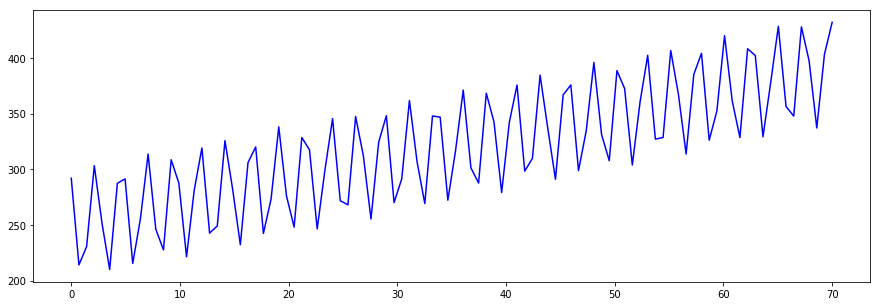

In [872]:
plt.plot(x1, y1, 'b-')

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR. 

In [880]:
ind = list(range(0,52)) +\
list(range(53,61)) +\
list(range(62,76)) +\
list(range(78,100)) +\
list(range(101,143))
params_df = find_fn(x1, y1, ind = ind)
params_df

C:\Users\pdonato\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply


,name,parameters,ssr
11,linear + sine,"[1.9999999999999976, 250.00000000000006, 50.00...",7.305120e-23
12,linear + sinec,"[1.9999999999999838, 39222.08760833281, 50.000...",1.144025e-21
97,linear + sinec + exponential + logistic,"[2.0000000001822484, 13145.916601203191, 49.99...",4.118972e-14
96,linear + sine + exponential + logistic,"[1.9999999996644136, 250.00017205067755, 50.00...",8.160891e-14
21,quadraticn + sine,"[-8.660898313585259e-11, 1.999999993941961, 25...",1.038860e-13
56,quadratic + sine + exponential,"[1.4923924624210745e-10, 1.9999999891301359, 2...",2.740674e-13
25,cubic + sine,"[8.950622708759014e-12, -9.301456388439964e-10...",3.578294e-13
48,linear + sine + exponential,"[1.999999998856692, 250.00000005428774, 49.999...",9.746253e-13
70,cubic + sine + logistic,"[-1.1070863346569471e-11, 1.3001323547025094e-...",1.481299e-12
50,linear + sinec + exponential,"[1.9999999981586707, 4147.23138014178, 50.0000...",1.488194e-12


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

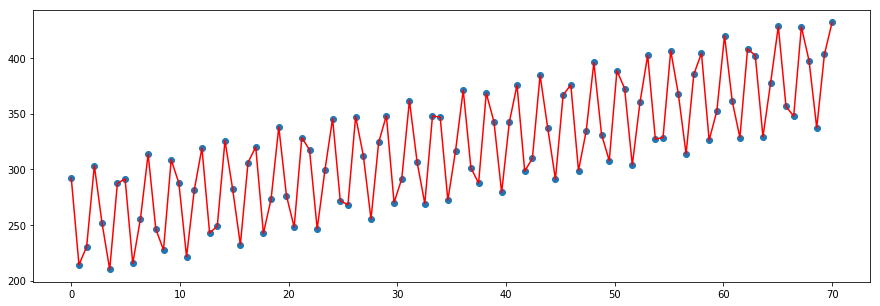

In [459]:
x_range = np.linspace(min(x1), max(x1), 100)
plt.scatter(x1, y1)
plt.plot(x_range, my_linear_sine(x_range, *params_df.iloc[0,1]), 'r-')

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [764]:
df2 = pd.read_csv('fit_data2.csv')
print(df2)

            x         y
0    0.000000  0.000000
1    0.008008  0.007944
2    0.016016  0.015762
3    0.024024  0.023454
4    0.032032  0.031022
5    0.040040  0.038469
6    0.048048  0.045794
7    0.056056  0.053000
8    0.064064  0.060089
9    0.072072  0.067060
10   0.080080  0.073917
11   0.088088  0.080661
12   0.096096  0.087291
13   0.104104  0.093811
14   0.112112  0.100222
15   0.120120  0.106524
16   0.128128  0.112720
17   0.136136  0.118809
18   0.144144  0.124795
19   0.152152  0.130677
20   0.160160  0.136458
21   0.168168  0.142138
22   0.176176  0.147718
23   0.184184  0.153201
24   0.192192  0.158587
25   0.200200  0.163877
26   0.208208  0.169073
27   0.216216  0.174175
28   0.224224  0.179186
29   0.232232  0.184105
..        ...       ...
970  7.767768  0.003287
971  7.775776  0.003264
972  7.783784  0.003241
973  7.791792  0.003219
974  7.799800  0.003196
975  7.807808  0.003174
976  7.815816  0.003152
977  7.823824  0.003130
978  7.831832  0.003108
979  7.839840  0

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [765]:
x2 = df2.x.to_numpy()
y2 = df2.y.to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

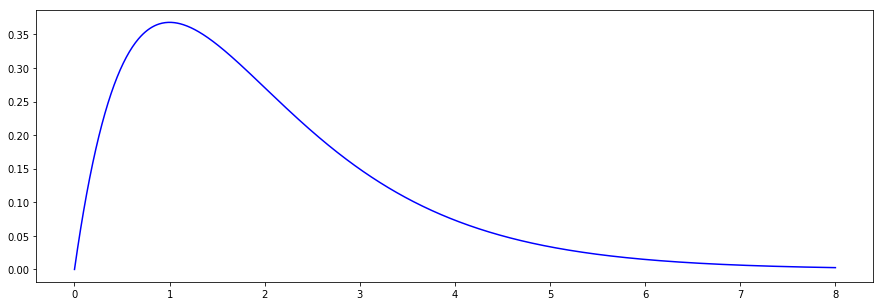

In [766]:
plt.plot(x2, y2, 'b-')

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

In [767]:
ind = list(range(0,4)) +\
list(range(5,18)) +\
list(range(19,33)) +\
list(range(35,37)) +\
list(range(38,42)) +\
list(range(43,57)) +\
list(range(58,66)) +\
list(range(67,70)) +\
list(range(71,72)) +\
list(range(73,84)) +\
list(range(87,91)) +\
list(range(92,93)) +\
list(range(95,97)) +\
list(range(98,101)) +\
list(range(102,104)) +\
list(range(105,108)) +\
list(range(110,111)) +\
list(range(112,114)) +\
list(range(115,117)) +\
list(range(118,120)) +\
list(range(121,122)) +\
list(range(123,124)) +\
list(range(125,127)) +\
list(range(132,133)) +\
list(range(134,135)) +\
list(range(136,137)) +\
list(range(138,139)) +\
list(range(140,141)) +\
list(range(142,143))

params_df = find_fn(x2, y2, ind = ind)
params_df.iloc[0:30,]

C:\Users\pdonato\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply


,name,parameters,ssr
100,linear + quadraticn + sinec + exponential + lo...,"[-0.5438902892088892, -2944.32359909339, 0.000...",0.000002
79,linear + quadraticn + exponential + logistic,"[-0.6652815522879829, 2081.621980022174, -4.17...",0.000004
103,quadraticn + cubic + sinec + exponential + log...,"[1.593810727027878, -0.6033877822333279, 8129....",0.001664
65,cubic + exponential + logistic,"[-0.0022590001151764736, 0.045987957750848574,...",0.001664
81,linear + cubic + sinec + exponential,"[-0.47048940232920466, -8045.161409763754, -0....",0.003795
85,quadratic + cubic + sine + exponential,"[-0.1810127366357845, -1.0373457511125812, 140...",0.003843
86,quadratic + cubic + sinec + exponential,"[-0.15918643557814907, -0.5843536174302516, -8...",0.003843
104,linear + quadratic + cubic + sinec + exponenti...,"[-0.20806378194173347, -5750.700790072964, -0....",0.003843
105,linear + quadraticn + cubic + sinec + exponent...,"[0.24967805160941742, -5750.786816291048, 1.86...",0.003843
96,linear + quadratic + cubic + sinec + exponential,"[-0.17647505113213544, -5750.543643910355, -0....",0.003843


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

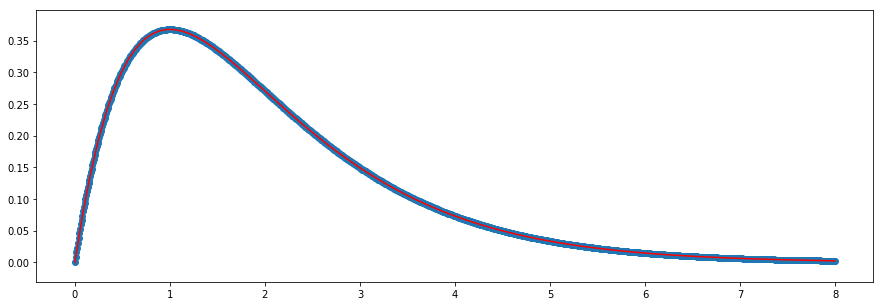

In [769]:
x_range = np.linspace(min(x2), max(x2), 100)
plt.scatter(x2, y2)
plt.plot(x_range, my_linear_quadraticn_sinec_exponential_logistic(x_range, *params_df.iloc[0,1]), 'r-')

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [770]:
df3 = pd.read_csv('fit_data3.csv')
print(df3)

            x          y
0  -12.566371   1.000000
1  -12.312505   0.470743
2  -12.058638   0.232564
3  -11.804772   0.126156
4  -11.550906   0.078146
5  -11.297040   0.057000
6  -11.043174   0.049957
7  -10.789308   0.053056
8  -10.535442   0.068018
9  -10.281576   0.103597
10 -10.027710   0.182468
11  -9.773844   0.358416
12  -9.519978   0.751888
13  -9.266112   1.606414
14  -9.012246   3.329398
15  -8.758380   6.388356
16  -8.504513  10.883910
17  -8.250647  15.911830
18  -7.996781  19.481481
19  -7.742915  19.717674
20  -7.489049  16.484880
21  -7.235183  11.515890
22  -6.981317   6.878240
23  -6.727451   3.630552
24  -6.473585   1.764300
25  -6.219719   0.826734
26  -5.965853   0.392154
27  -5.711987   0.197519
28  -5.458121   0.110386
29  -5.204254   0.071051
..        ...        ...
70   5.204254  14.074436
71   5.458121   9.059148
72   5.711987   5.062814
73   5.965853   2.550018
74   6.219719   1.209578
75   6.473585   0.566797
76   6.727451   0.275440
77   6.981317   0.145386


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [771]:
x3 = df3.x.to_numpy()
y3 = df3.y.to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

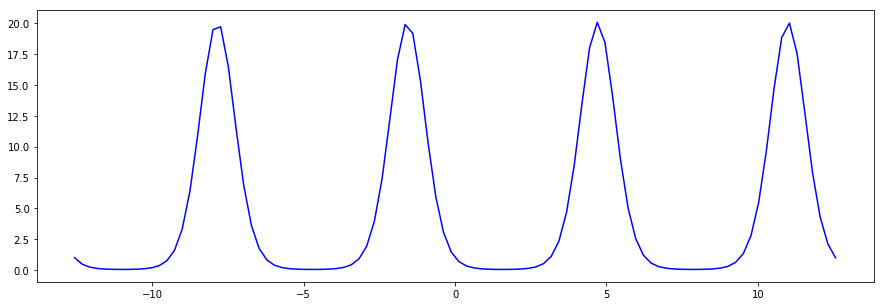

In [772]:
plt.plot(x3, y3, 'b-')

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

In [790]:
ind = list(range(0,117)) +\
list(range(118,142)) 

params_df = find_fn(x3, y3, ind = ind)
params_df

,name,parameters,ssr
141,my_gaussian,"[5.329070518200751e-16, 7.328115846459166]",0.020410
132,linear + cubic + sine + exponential + logistic,"[-5408021.903271543, -12563304.207093611, 0.00...",4007.485396
115,quadraticn + sine + exponential + logistic,"[-0.05294243069127219, -0.415387138259402, -61...",4009.068809
119,linear + quadratic + cubic + sine + logistic,"[-9958.464009769703, 277742.1923923377, 1978.9...",4025.804820
57,quadratic + sine + exponential,"[0.05350683406770975, -0.42756854751849804, 5....",4032.179844
108,quadratic + sine + exponential + logistic,"[0.05256380008551027, -0.41309119041702175, -1...",4032.188099
75,cubic + exponential + logistic,"[0.0013959564032730075, 0.027709214415866396, ...",4032.329992
27,cubic + exponential,"[0.0013926074259800224, 0.02777357010627043, -...",4032.329998
66,quadraticn + sine + exponential,"[-0.050440357429101676, -0.3814233390763495, 5...",4032.717027
23,quadraticn + exponential,"[-0.05326047757483742, -0.4265188056392281, 5....",4033.658595


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

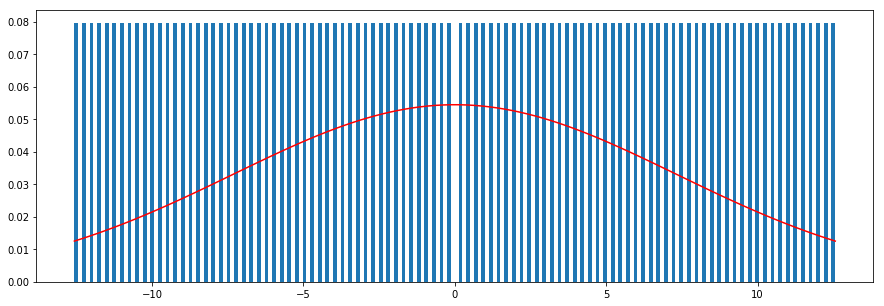

In [798]:
x_range = np.linspace(min(x3), max(x3), 100)
plt.hist(x3, bins = 200, density = True)
plt.plot(x_range, gaussian(x_range, *params_df.iloc[0,1]), 'r-')

SSR: 1585.8037768015788


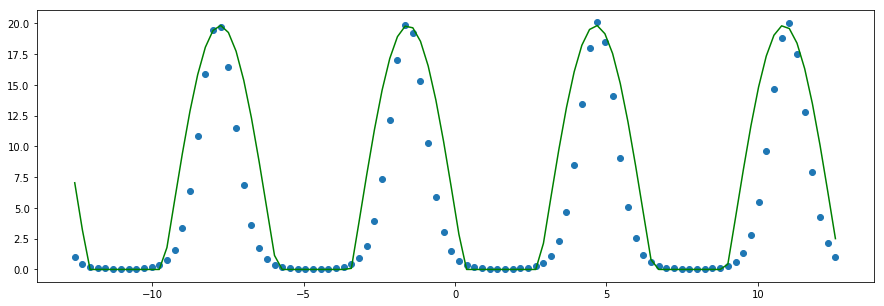

In [1115]:
def cust_sine(x, A4,f4, C4, D4):
    return 15*np.sin(f4*x + C4) +D4

popt, pcov = curve_fit(rsine, x3, y3)

x_range = np.linspace(min(x3), max(x3), 100)
plt.scatter(x3, y3)
y_hat = np.where(cust_sine(x_range, *popt) < 0, 0, cust_sine(x_range, *popt))
plt.plot(x_range, y_hat, 'g-')
print("SSR:", calc_ssr(y3, y_hat))

In [1109]:
pd.DataFrame({'y' : y3,
              'yhat' : y_hat})

,y,yhat
0,1.000000,7.047423
1,0.470743,3.204659
2,0.232564,0.000000
3,0.126156,0.000000
4,0.078146,0.000000
5,0.057000,0.000000
6,0.049957,0.000000
7,0.053056,0.000000
8,0.068018,0.000000
9,0.103597,0.000000


In [994]:
tmp = pd.DataFrame({'x3' : x3,
                    'y3' : y3})
tmp.sort_values('x3').iloc[0:50,]

,x3,y3
0,-12.566371,1.000000
1,-12.312505,0.470743
2,-12.058638,0.232564
3,-11.804772,0.126156
4,-11.550906,0.078146
5,-11.297040,0.057000
6,-11.043174,0.049957
7,-10.789308,0.053056
8,-10.535442,0.068018
9,-10.281576,0.103597


#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [269]:
df4 = pd.read_csv('fit_data4.csv')
print(df4)

           x         y
0  -5.000000  0.010799
1  -4.898990  0.005704
2  -4.797980  0.006033
3  -4.696970  0.059341
4  -4.595960  0.020562
5  -4.494949 -0.026139
6  -4.393939  0.049021
7  -4.292929  0.001904
8  -4.191919  0.068923
9  -4.090909  0.018894
10 -3.989899 -0.002008
11 -3.888889 -0.034772
12 -3.787879  0.042384
13 -3.686869 -0.034893
14 -3.585859 -0.002146
15 -3.484848  0.007803
16 -3.383838 -0.031541
17 -3.282828  0.025273
18 -3.181818  0.052120
19 -3.080808  0.032402
20 -2.979798  0.049587
21 -2.878788 -0.034954
22 -2.777778  0.046449
23 -2.676768  0.040240
24 -2.575758  0.031297
25 -2.474747 -0.029311
26 -2.373737 -0.010976
27 -2.272727  0.011008
28 -2.171717  0.069509
29 -2.070707  0.048960
..       ...       ...
70  2.070707  0.986939
71  2.171717  1.045550
72  2.272727  0.954495
73  2.373737  1.074426
74  2.474747  0.930713
75  2.575758  1.005520
76  2.676768  0.959511
77  2.777778  0.974990
78  2.878788  1.032787
79  2.979798  1.009546
80  3.080808  1.057504
81  3.18181

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [614]:
x4 = df4.x.to_numpy()
y4 = df4.y.to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

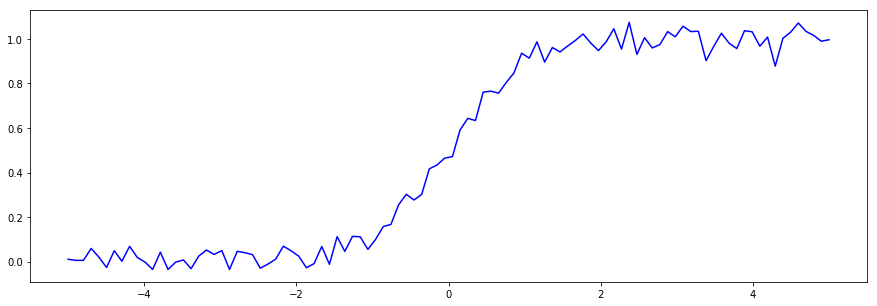

In [615]:
plt.plot(x4, y4, 'b-')

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

In [753]:
ind = list(range(0,7)) +\
list(range(8,15)) +\
list(range(16,18)) +\
list(range(19,23)) +\
list(range(24,31)) +\
list(range(32,37)) +\
list(range(38,42)) +\
list(range(43,55)) +\
list(range(56,57)) +\
list(range(58,59)) +\
list(range(60,61)) +\
list(range(62,66)) +\
list(range(67,70)) +\
list(range(72,73)) +\
list(range(74,82)) +\
list(range(83,84)) +\
list(range(85,91)) +\
list(range(92,93)) +\
list(range(94,96)) +\
list(range(97,98)) +\
list(range(99,100)) +\
list(range(100,103)) +\
list(range(104,105)) +\
list(range(106,108)) +\
list(range(109,115)) +\
list(range(116,121)) +\
list(range(122,143))

params_df = find_fn(x4, y4, ind = ind)
params_df.iloc[1:,]

,name,parameters,ssr
80,linear + sine + exponential + logistic,"[-0.005127824056089154, -0.005518089385183328,...",0.129132
81,linear + sinec + exponential + logistic,"[-0.005228756648271704, -11532.061498214836, 0...",0.129174
57,quadraticn + sinec + logistic,"[0.00010129017800082613, -0.003460792471387971...",0.129793
61,sine + exponential + logistic,"[0.009735842770380953, 1.508268167381969, 9.23...",0.138105
92,cubic + sine + exponential + logistic,"[0.0012737923051486465, -0.003033331618741623,...",0.138634
93,cubic + sinec + exponential + logistic,"[0.0011770257446305956, -0.0017714121611506167...",0.138653
112,quadraticn + cubic + sinec + exponential + log...,"[-443.94682732795695, -3803.1855419366107, 0.0...",0.138655
110,quadratic + cubic + sinec + exponential + logi...,"[463.04857900497166, 3749.0148172544637, -1.64...",0.138655
116,linear + quadraticn + cubic + sinec + exponent...,"[1805.2519310929456, 0.5955375043766801, -874....",0.138655
111,quadraticn + cubic + sine + exponential + logi...,"[-458.5788128995402, -3790.3162896937624, -0.1...",0.138655


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

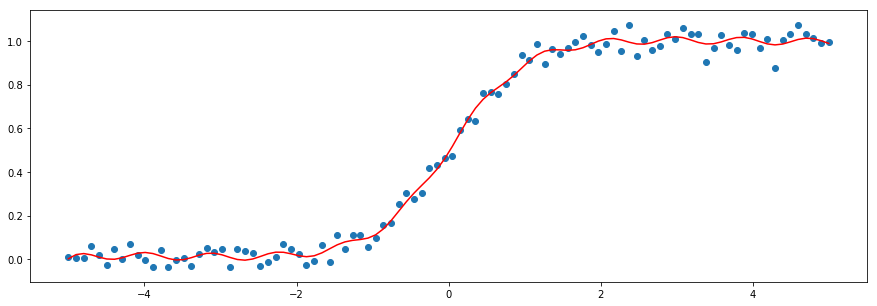

In [763]:
x_range = np.linspace(min(x4), max(x4), 100)
plt.scatter(x4, y4)
plt.plot(x_range, my_linear_sine_exponential_logistic(x_range, *params_df.iloc[1,1]), 'r-')